# Cluster the Countries by the socio-economic and health factors

In [1018]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [1019]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Data Set Review

In [1020]:
country=pd.read_csv(r"D:\My Personal Docs\Education Program\ML\UnSupervised Learning\ClusterAssignment\Country-data.csv")
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [1021]:
country.shape

(167, 10)

In [1022]:
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [1023]:
country.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


## Converting Imports , exports and health fields .
- As per dictionary it says values are  % of Gdpp

In [1024]:
country['imports']=(country.imports * country.gdpp)/100
country['exports']=(country.exports * country.gdpp)/100
country['health']=(country.health * country.gdpp)/100

In [1025]:
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [1026]:
country.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


# Looking at different parameters of a country for outlier analysis

In [1027]:
col=list(country.columns[1:])
col

['child_mort',
 'exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp']

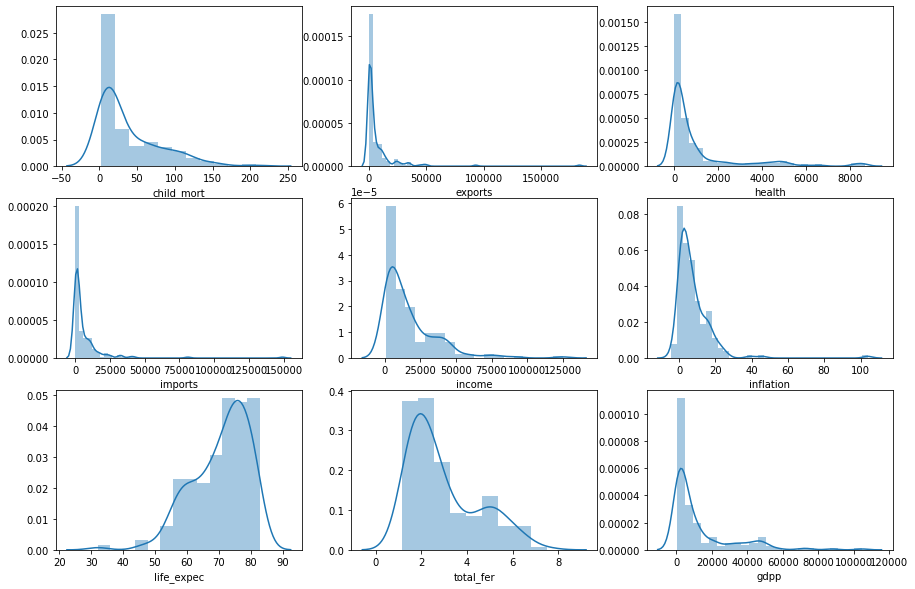

In [1028]:
# Looking at data distribution of all metrics in data frame
plt.figure(figsize=[15,10])
for i in enumerate(col):    
    plt.subplot(3,3,i[0]+1)
    sns.distplot(country[i[1]])
       

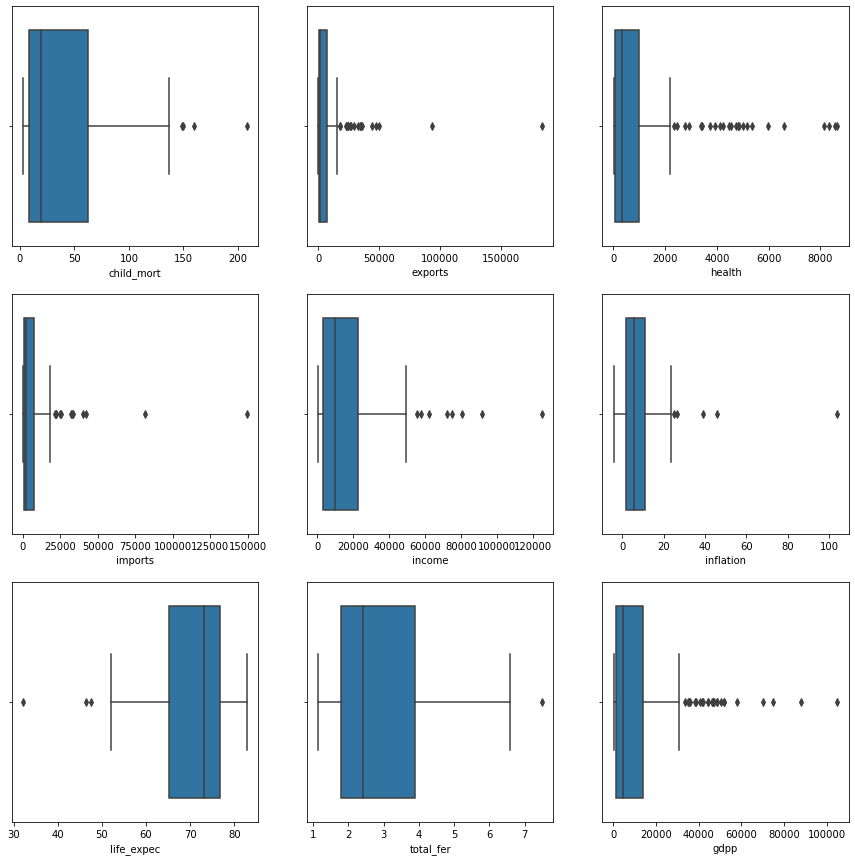

In [1029]:
# checking outliers for all numeric fields 
plt.figure(figsize=[15,15])
for i in enumerate(col):    
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(country[i[1]])
       

- Almost every variable has outliers
- country with higher exports can be capped 
- country with higher health spend per capita can also be capped
- higher income countries can as well be capped 
- We can work on GDPP , higher GDPP can be capped , as they are not in need of aid


# Outlier Treatment  using Capping

In [1030]:
country.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [1031]:
outlier_col=['exports','health','income','gdpp','imports','child_mort','inflation']
for i in enumerate(outlier_col):   
    q1=country[i[1]].quantile(.01)    
    q4=country[i[1]].quantile(.95)    
    country[i[1]]=country[i[1]].apply(lambda x: q1 if x < q1 else x)
    country[i[1]]=country[i[1]].apply(lambda x: q4 if x > q4 else x)

In [1032]:
country.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,36.786228,5783.251215,954.046177,5140.799750,15739.811257,6.945679,70.555689,2.947964,11999.456527
std,36.214738,8579.961446,1453.404740,6695.667657,14786.078083,6.358370,8.893172,1.513848,15157.723194
min,2.800000,22.243716,17.009362,104.909640,742.240000,-2.348800,32.100000,1.150000,331.620000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,116.000000,31385.100000,4966.701000,24241.560000,48290.000000,20.870000,82.800000,7.490000,48610.000000


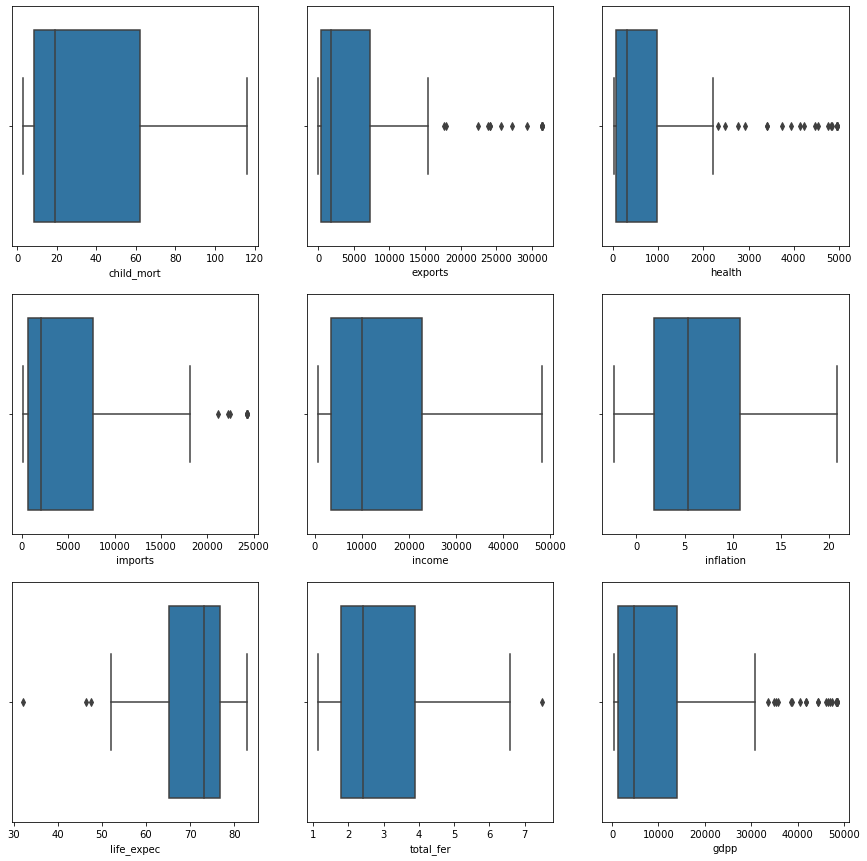

In [1033]:
# Checking post cleanup distribution
plt.figure(figsize=[15,15])
for i in enumerate(col):    
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(country[i[1]])

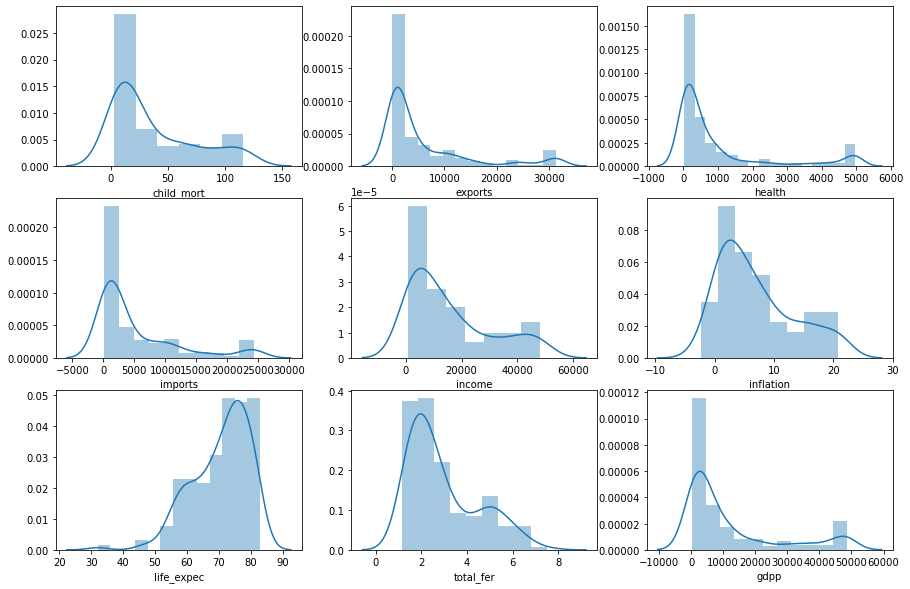

In [1034]:
# data distribution after outlier handling
plt.figure(figsize=[15,10])
for i in enumerate(col):    
    plt.subplot(3,3,i[0]+1)
    sns.distplot(country[i[1]])       

# Univariate Analysis

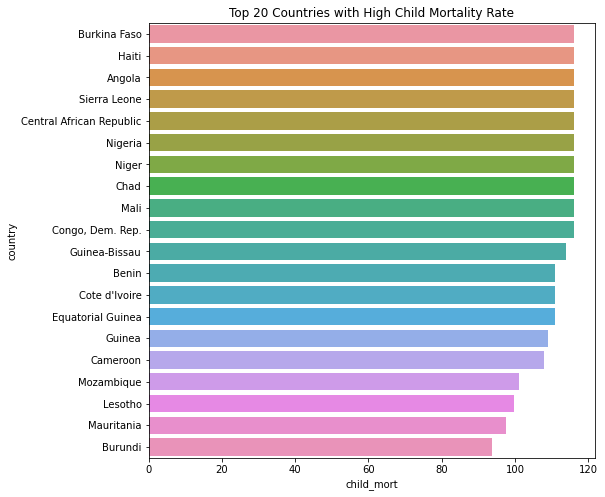

In [1035]:
# Checking Top 20 countries based on child mortality
plt.figure(figsize=[8,8])
sns.barplot(data=country.sort_values(by='child_mort',ascending=False).head(20), y='country',x='child_mort')
plt.title('Top 20 Countries with High Child Mortality Rate')
plt.show()

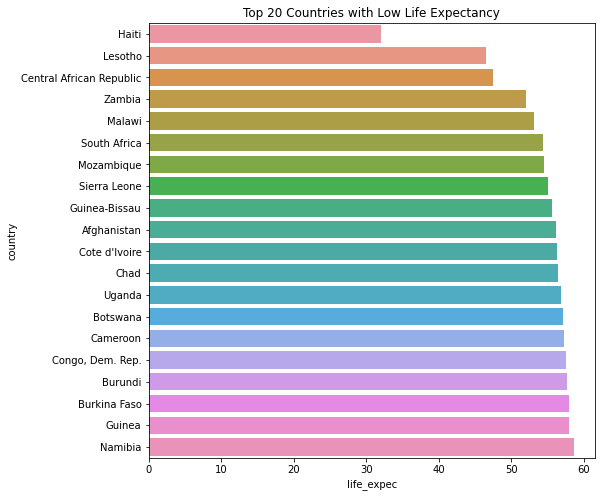

In [1036]:
# Checking Top 20 countries based on Life Expectancy
plt.figure(figsize=[8,8])
sns.barplot(data=country.sort_values(by='life_expec',ascending=True).head(20), y='country',x='life_expec')
plt.title('Top 20 Countries with Low Life Expectancy')
plt.show()

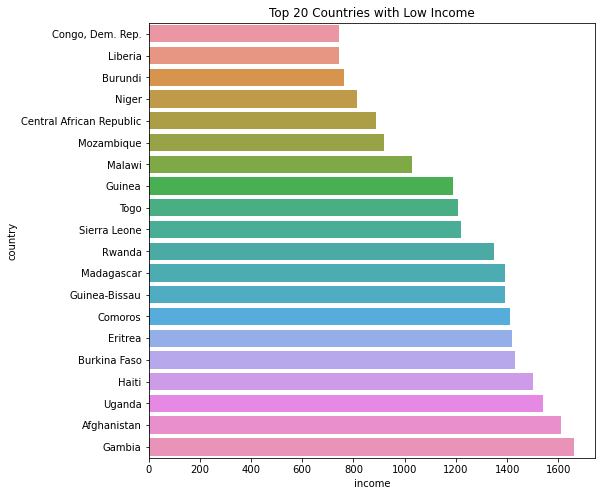

In [1037]:
# Checking Top 20 countries based on child mortality
plt.figure(figsize=[8,8])
sns.barplot(data=country.sort_values(by='income',ascending=True).head(20), y='country',x='income')
plt.title('Top 20 Countries with Low Income')
plt.show()

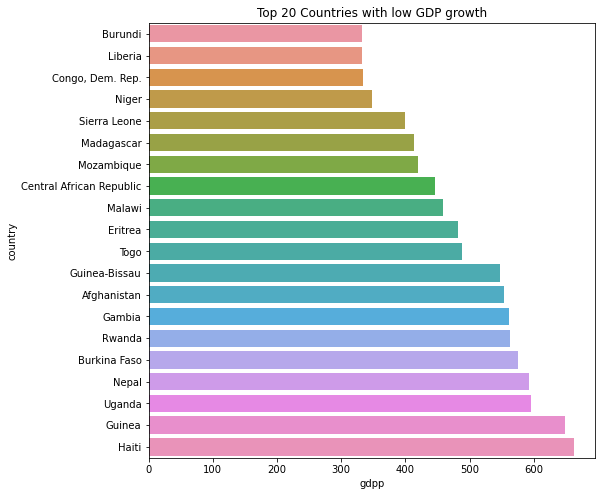

In [1038]:
# Country with Low GDPP
# Checking Top 20 countries based on child mortality
plt.figure(figsize=[8,8])
sns.barplot(data=country.sort_values(by='gdpp',ascending=True).head(20), y='country',x='gdpp')
plt.title('Top 20 Countries with low GDP growth')
plt.show()

# Bivariate Analysis

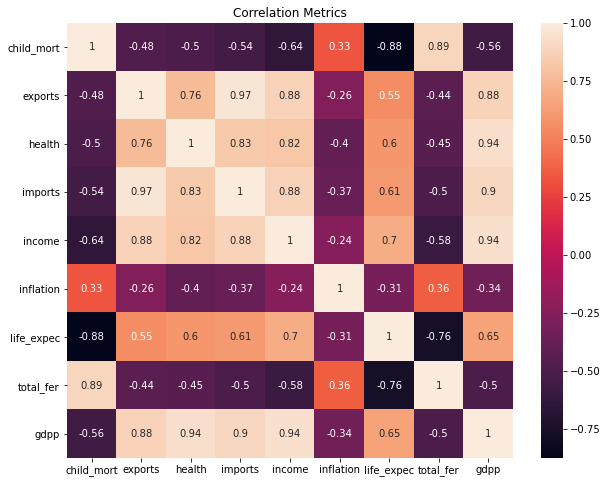

In [1039]:
# Checking on correlation between different socio economic factors of country
plt.figure(figsize=[10,8])
sns.heatmap(data=country.corr(),annot=True)
plt.title('Correlation Metrics')
plt.show()

In [1040]:
 # GDP highly correlation to Exports , health , income
 # GDP -vely correlated to child mortality , inflation and total fertality
 # There is -ve correlation between child mortality and life expectancy
 # import and export are also highly correlated

# Data Scaling

In [1041]:
# Scaling the data 
scaler=StandardScaler()

In [1042]:
country_scaled=scaler.fit_transform(country[col])

In [1043]:
country_scaled=pd.DataFrame(country_scaled)
country_scaled.columns=col

In [1044]:
country_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.479354,-0.669604,-0.629468,-0.732894,-0.958490,0.393469,-1.619092,1.902882,-0.757428
1,-0.559080,-0.542194,-0.473519,-0.472327,-0.394106,-0.387374,0.647866,-0.859973,-0.523380
2,-0.262732,-0.475859,-0.530048,-0.560304,-0.192637,1.444058,0.670423,-0.038404,-0.498896
3,2.193914,-0.418981,-0.588967,-0.543237,-0.667480,2.196506,-1.179234,2.128151,-0.560436
4,-0.733566,-0.027150,-0.150710,0.306340,0.227937,-0.868499,0.704258,-0.541946,0.013270


# Hopkins Test for Cluster Tendency

In [1045]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan

def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) # heuristic from article [1]
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)

    rand_X = sample(range(0, n, 1), m)

    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])

    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print (ujd, wjd)
        H = 0

    return H

In [1046]:
hopkins(country_scaled[col])

0.8743005081535756

In [1047]:
# After running multiple times the hopkins , we get more than 80% score , based on which we can say data is good for clustering

# Silhouette Metrics

In [1048]:
ss=[]
for k in range(2,11):
    kmean=KMeans(n_clusters=k).fit(country_scaled[col])
    ss.append([k,silhouette_score(country_scaled[col],kmean.labels_)])

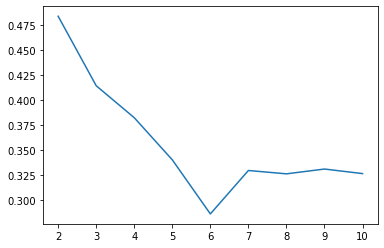

In [1049]:
sil=pd.DataFrame(ss)
plt.plot(sil[0],sil[1])
plt.show()

In [1050]:
# looking at silhouette score , we can go with 3 cluster

# Kmeans  with k==3

In [1051]:
# looking at manual clustering , choosing k as 4
kmeans=KMeans(n_clusters=3, random_state=0)

In [1052]:
### cluster based on only GDP , CHILD MORT , InCOME
kmeans.fit(country_scaled)

KMeans(n_clusters=3, random_state=0)

In [1053]:
kmeans.labels_

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 2,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       2, 2, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 2, 2, 2, 0, 0, 2, 2, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0])

In [1054]:
country_scaled['Cluster']=kmeans.labels_

In [1055]:
country_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
0,1.479354,-0.669604,-0.629468,-0.732894,-0.958490,0.393469,-1.619092,1.902882,-0.757428,0
1,-0.559080,-0.542194,-0.473519,-0.472327,-0.394106,-0.387374,0.647866,-0.859973,-0.523380,1
2,-0.262732,-0.475859,-0.530048,-0.560304,-0.192637,1.444058,0.670423,-0.038404,-0.498896,1
3,2.193914,-0.418981,-0.588967,-0.543237,-0.667480,2.196506,-1.179234,2.128151,-0.560436,0
4,-0.733566,-0.027150,-0.150710,0.306340,0.227937,-0.868499,0.704258,-0.541946,0.013270,1


In [1056]:
country_scaled.Cluster.value_counts()

1    82
0    48
2    37
Name: Cluster, dtype: int64

In [1057]:
# Adding country to the scaled and clustered data
country_scaled=pd.concat([country.country,country_scaled],axis=1)
country_scaled.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
0,Afghanistan,1.479354,-0.669604,-0.629468,-0.732894,-0.958490,0.393469,-1.619092,1.902882,-0.757428,0
1,Albania,-0.559080,-0.542194,-0.473519,-0.472327,-0.394106,-0.387374,0.647866,-0.859973,-0.523380,1
2,Algeria,-0.262732,-0.475859,-0.530048,-0.560304,-0.192637,1.444058,0.670423,-0.038404,-0.498896,1
3,Angola,2.193914,-0.418981,-0.588967,-0.543237,-0.667480,2.196506,-1.179234,2.128151,-0.560436,0
4,Antigua and Barbuda,-0.733566,-0.027150,-0.150710,0.306340,0.227937,-0.868499,0.704258,-0.541946,0.013270,1


# Visualization of Cluster using child_mort, income , gdpp

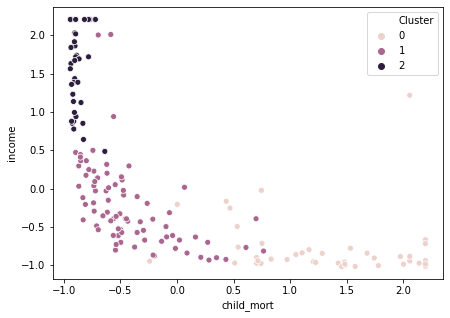

In [1058]:
plt.figure(figsize=[7,5])
sns.scatterplot(data=country_scaled , x='child_mort' , y='income' , hue='Cluster')
plt.show()

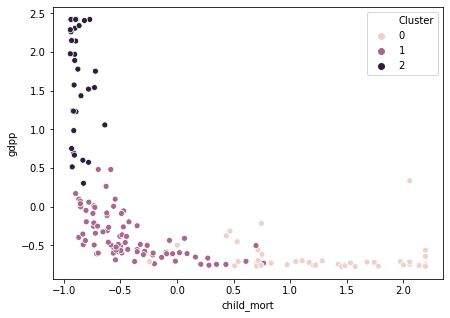

In [1059]:
plt.figure(figsize=[7,5])
sns.scatterplot(data=country_scaled , x='child_mort' , y='gdpp' , hue='Cluster')
plt.show()

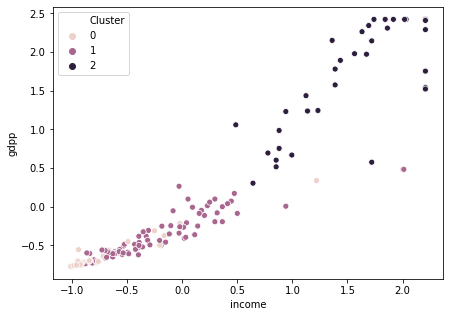

In [1060]:
plt.figure(figsize=[7,5])
sns.scatterplot(data=country_scaled , x='income' , y='gdpp' , hue='Cluster')
plt.show()

# Cluster Profiling
- Low GDPP , Low Income , High Child Mortality

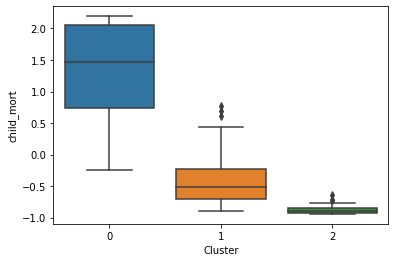

In [1061]:
sns.boxplot(data=country_scaled,x='Cluster',y='child_mort')
plt.show()

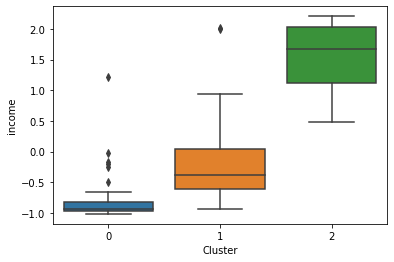

In [1062]:
sns.boxplot(data=country_scaled,x='Cluster',y='income')
plt.show()

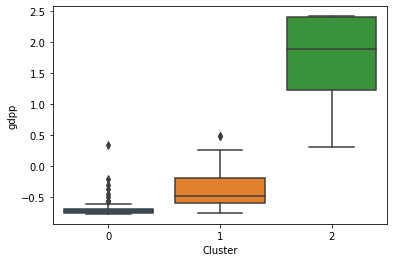

In [1063]:
sns.boxplot(data=country_scaled,x='Cluster',y='gdpp')
plt.show()

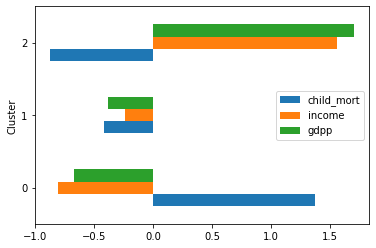

In [1064]:
# profiling countries based on three factors : child mortality , income & gdpp
country_scaled[['child_mort','income','gdpp','Cluster']].groupby('Cluster').mean().plot(kind='barh')
plt.show()

In [1065]:
# Cluster 0 countries have High Child Mortality , Low Income and Low GDP

In [1066]:
# Get Cluster 0 Countries
country_select=country_scaled[country_scaled.Cluster==0]

In [1067]:
country_select.sort_values(by=['child_mort','income','gdpp'], ascending=[False,True,True]).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
37,"Congo, Dem. Rep.",2.193914,-0.660021,-0.640163,-0.745273,-1.017354,2.185464,-1.472473,2.379922,-0.771919,0
112,Niger,2.193914,-0.667038,-0.646004,-0.744493,-1.012486,-0.693401,-1.325854,3.009349,-0.770993,0
31,Central African Republic,2.193914,-0.669917,-0.646146,-0.752384,-1.007467,-0.778584,-2.600313,1.498724,-0.764508,0
132,Sierra Leone,2.193914,-0.668233,-0.622324,-0.749468,-0.984945,1.617578,-1.754433,1.492098,-0.767618,0
25,Burkina Faso,2.193914,-0.663163,-0.631651,-0.744593,-0.970700,-0.021403,-1.427359,1.936010,-0.755972,0
66,Haiti,2.193914,-0.664228,-0.626827,-0.705928,-0.965952,-0.235937,-4.337186,0.253120,-0.750215,0
97,Mali,2.193914,-0.657198,-0.634064,-0.732863,-0.940853,-0.406303,-1.246905,2.386548,-0.747171,0
32,Chad,2.193914,-0.637480,-0.630354,-0.711638,-0.936783,-0.087656,-1.585257,2.413050,-0.734665,0
113,Nigeria,2.193914,-0.607157,-0.576872,-0.709357,-0.718355,2.196506,-1.134121,1.916133,-0.639841,0
3,Angola,2.193914,-0.418981,-0.588967,-0.543237,-0.667480,2.196506,-1.179234,2.128151,-0.560436,0


# Hierarchical Clustering
 - Single & Complete Linkage
 - Scatter Plot
 - Profiling
 


In [1068]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

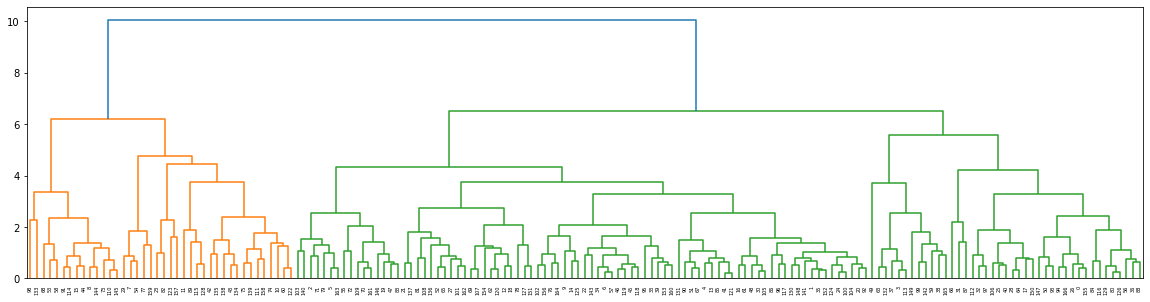

In [1069]:
plt.figure(figsize=[20,5])
new =linkage(country_scaled[col],method='complete',metric='euclidean')
dendrogram(new)
plt.show()

In [1070]:
cluster_labels = cut_tree(new, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 2,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 1, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 0, 1, 2, 1, 0, 1, 1, 0,
       0, 2, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       2, 2, 0, 0, 2, 2, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2, 0, 1, 1,
       0, 2, 2, 2, 1, 1, 2, 2, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0])

In [1071]:
# assign cluster labels
country_scaled['hier_cluster'] = cluster_labels
country_scaled.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster,hier_cluster
0,Afghanistan,1.479354,-0.669604,-0.629468,-0.732894,-0.958490,0.393469,-1.619092,1.902882,-0.757428,0,0
1,Albania,-0.559080,-0.542194,-0.473519,-0.472327,-0.394106,-0.387374,0.647866,-0.859973,-0.523380,1,1
2,Algeria,-0.262732,-0.475859,-0.530048,-0.560304,-0.192637,1.444058,0.670423,-0.038404,-0.498896,1,1
3,Angola,2.193914,-0.418981,-0.588967,-0.543237,-0.667480,2.196506,-1.179234,2.128151,-0.560436,0,0
4,Antigua and Barbuda,-0.733566,-0.027150,-0.150710,0.306340,0.227937,-0.868499,0.704258,-0.541946,0.013270,1,1


In [1072]:
country_scaled.hier_cluster.value_counts()

1    86
0    41
2    40
Name: hier_cluster, dtype: int64

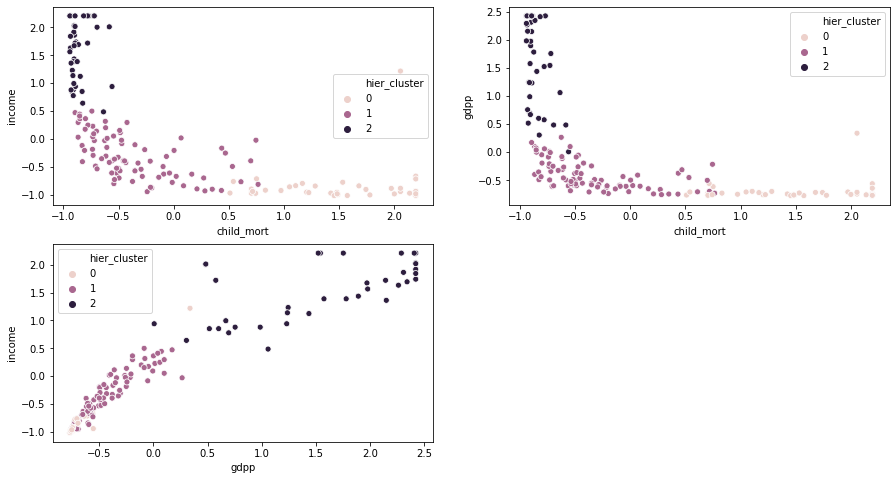

In [1073]:
# child mort , income , gdp
plt.figure(figsize=[15,8])

plt.subplot(2,2,1)
sns.scatterplot(data=country_scaled , x='child_mort' , y='income' , hue='hier_cluster')

plt.subplot(2,2,2)
sns.scatterplot(data=country_scaled , x='child_mort' , y='gdpp' , hue='hier_cluster')

plt.subplot(2,2,3)
sns.scatterplot(data=country_scaled , x='gdpp' , y='income' , hue='hier_cluster')

plt.show()


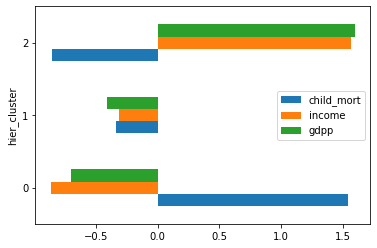

In [1074]:
# profiling countries based on three factors : child mortality , income & gdpp
country_scaled[['child_mort','income','gdpp','hier_cluster']].groupby('hier_cluster').mean().plot(kind='barh')
plt.show()

In [1075]:
country_select=country_scaled[country_scaled.hier_cluster==0]
country_select.sort_values(by=['child_mort','income','gdpp'], ascending=[False,True,True]).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster,hier_cluster
37,"Congo, Dem. Rep.",2.193914,-0.660021,-0.640163,-0.745273,-1.017354,2.185464,-1.472473,2.379922,-0.771919,0,0
112,Niger,2.193914,-0.667038,-0.646004,-0.744493,-1.012486,-0.693401,-1.325854,3.009349,-0.770993,0,0
31,Central African Republic,2.193914,-0.669917,-0.646146,-0.752384,-1.007467,-0.778584,-2.600313,1.498724,-0.764508,0,0
132,Sierra Leone,2.193914,-0.668233,-0.622324,-0.749468,-0.984945,1.617578,-1.754433,1.492098,-0.767618,0,0
25,Burkina Faso,2.193914,-0.663163,-0.631651,-0.744593,-0.970700,-0.021403,-1.427359,1.936010,-0.755972,0,0
66,Haiti,2.193914,-0.664228,-0.626827,-0.705928,-0.965952,-0.235937,-4.337186,0.253120,-0.750215,0,0
97,Mali,2.193914,-0.657198,-0.634064,-0.732863,-0.940853,-0.406303,-1.246905,2.386548,-0.747171,0,0
32,Chad,2.193914,-0.637480,-0.630354,-0.711638,-0.936783,-0.087656,-1.585257,2.413050,-0.734665,0,0
113,Nigeria,2.193914,-0.607157,-0.576872,-0.709357,-0.718355,2.196506,-1.134121,1.916133,-0.639841,0,0
3,Angola,2.193914,-0.418981,-0.588967,-0.543237,-0.667480,2.196506,-1.179234,2.128151,-0.560436,0,0


# Hierachical Single Linkage

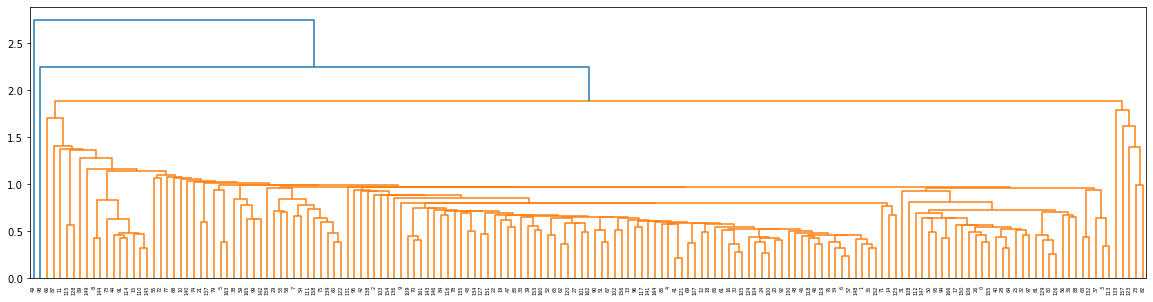

In [1076]:
plt.figure(figsize=[20,5])
new =linkage(country_scaled[col],method='single',metric='euclidean')
dendrogram(new)
plt.show()

In [1077]:
cluster_labels = cut_tree(new, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [1078]:
# assign cluster labels
country_scaled['hier_single_cluster'] = cluster_labels
country_scaled.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster,hier_cluster,hier_single_cluster
0,Afghanistan,1.479354,-0.669604,-0.629468,-0.732894,-0.958490,0.393469,-1.619092,1.902882,-0.757428,0,0,0
1,Albania,-0.559080,-0.542194,-0.473519,-0.472327,-0.394106,-0.387374,0.647866,-0.859973,-0.523380,1,1,0
2,Algeria,-0.262732,-0.475859,-0.530048,-0.560304,-0.192637,1.444058,0.670423,-0.038404,-0.498896,1,1,0
3,Angola,2.193914,-0.418981,-0.588967,-0.543237,-0.667480,2.196506,-1.179234,2.128151,-0.560436,0,0,0
4,Antigua and Barbuda,-0.733566,-0.027150,-0.150710,0.306340,0.227937,-0.868499,0.704258,-0.541946,0.013270,1,1,0


In [1079]:
country_scaled.hier_single_cluster.value_counts()

0    165
2      1
1      1
Name: hier_single_cluster, dtype: int64

# Findings

* Clusters are properly distributed using Kmeans & Hierarchical Complete Linkage but its not the case with single linkage hierarchical clustering
* Single Linkage gave the unbalanced cluster 
* We can go either of clustering method , I would be going with KMeans Clustering